In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d.proj3d import proj_transform
import numpy as np
plt.rcParams.update({'font.size': 14})
# https://github.com/matplotlib/ipympl#installation for matplotlib images to appear in notebook
# %matplotlib widget

In [2]:
cool_colors = {'green': (0.0, 0.716, 0.554), 'red': (1.0, 0.403, 0.397), 'blue': (0.0, 0.747, 1.0), "yellow": (0.830929, 0.793470, 0.225663), "purple": (0.745987, 0.663119, 1.000000)}

In [3]:
x_op = [0.15, 0.2, 0.23]

In [4]:
n_pts = 25

theta = np.linspace(0, 2 * np.pi, n_pts)
phi   = np.linspace(0, np.pi, n_pts)
r = 0.075

X = r * np.outer(np.cos(theta), np.sin(phi)) + x_op[0]
Y = r * np.outer(np.sin(theta), np.sin(phi)) + x_op[1]
Z = r * np.outer(np.ones(np.size(theta)), np.cos(phi)) + x_op[2]

In [5]:
# https://gist.github.com/WetHat/1d6cd0f7309535311a539b42cccca89c
class Arrow3D(FancyArrowPatch):
    def __init__(self, x, y, z, dx, dy, dz, *args, **kwargs):
        super().__init__((0, 0), (0, 0), *args, **kwargs)
        self._xyz = (x, y, z)
        self._dxdydz = (dx, dy, dz)

    def draw(self, renderer):
        x1, y1, z1 = self._xyz
        dx, dy, dz = self._dxdydz
        x2, y2, z2 = (x1 + dx, y1 + dy, z1 + dz)

        xs, ys, zs = proj_transform((x1, x2), (y1, y2), (z1, z2), self.axes.M)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
        super().draw(renderer)

def _arrow3D(ax, x, y, z, dx, dy, dz, muh_label, label_stretch, *args, **kwargs):
    '''Add an 3d arrow to an `Axes3D` instance.'''

    arrow = Arrow3D(x, y, z, dx, dy, dz, *args, **kwargs)
    ax.add_artist(arrow)
    dd = np.array([x+dx, y+dy, z+dz])
    dd = dd / np.linalg.norm(dd)

    ax.text(x+dx+label_stretch*dd[0], y+dy+label_stretch*dd[1], z+dz+label_stretch*dd[2], muh_label, ha="center", va="center")


setattr(Axes3D, 'arrow3D', _arrow3D)

In [6]:
J = np.array([[1, 2, 5], [3, 4, 6]])
J

array([[1, 2, 5],
       [3, 4, 6]])

In [7]:
np.linalg.svd(J)[0] # u

array([[-0.56849697,  0.82268536],
       [-0.82268536, -0.56849697]])

In [8]:
sigmas = np.linalg.svd(J)[1] # singular values

In [9]:
sigmas = sigmas

In [10]:
u1, u2 = np.transpose(np.linalg.svd(J)[0])
u1

array([-0.56849697, -0.82268536])

In [11]:
np.dot(u1, u2)

0.0

In [12]:
np.linalg.svd(J)[2] # vt

array([[-0.32127519, -0.46846588, -0.82299573],
       [-0.68355838, -0.48673972,  0.54390476],
       [-0.65538554,  0.73730873, -0.16384638]])

In [13]:
v1, v2, v3 = np.linalg.svd(J)[2]
v1

array([-0.32127519, -0.46846588, -0.82299573])

In [14]:
np.dot(J, v1)

array([-5.3731856 , -7.77566347])

In [15]:
u1 * sigmas[0]

array([-5.3731856 , -7.77566347])

In [16]:
theta = np.linspace(0, 2*np.pi, 250)

In [17]:
x = np.array([sigmas[0] * u1[0] * np.sin(t) + sigmas[1] * u2[0] * np.cos(t) for t in theta])
y = np.array([sigmas[0] * u1[1] * np.sin(t) + sigmas[1] * u2[1] * np.cos(t) for t in theta])
x

array([ 1.06248599,  0.92657691,  0.79007787,  0.65307579,  0.51565789,
        0.37791167,  0.23992483,  0.10178523, -0.03641918, -0.1746004 ,
       -0.31267045, -0.45054142, -0.58812553, -0.72533517, -0.862083  ,
       -0.99828193, -1.13384525, -1.26868665, -1.40272026, -1.53586076,
       -1.66802337, -1.79912394, -1.929079  , -2.05780581, -2.1852224 ,
       -2.31124765, -2.43580132, -2.55880411, -2.68017769, -2.79984479,
       -2.91772921, -3.0337559 , -3.14785099, -3.25994183, -3.36995704,
       -3.47782659, -3.58348179, -3.68685537, -3.78788152, -3.8864959 ,
       -3.98263573, -4.0762398 , -4.16724851, -4.25560391, -4.34124975,
       -4.4241315 , -4.50419638, -4.58139342, -4.65567346, -4.72698921,
       -4.79529527, -4.86054815, -4.92270629, -4.98173011, -5.03758205,
       -5.09022654, -5.13963006, -5.18576115, -5.22859044, -5.26809066,
       -5.30423667, -5.33700545, -5.36637612, -5.39233001, -5.41485057,
       -5.43392347, -5.44953656, -5.46167992, -5.47034579, -5.47

In [137]:
# from x0 to x.
def sketch_vector(x0, x, label=None, dx_mag=0.1, color="k", scale_back=0.95):
    plt.arrow(x0[0], x0[1], x[0], x[1], color=color, head_width=0.5, length_includes_head=True, lw=2, head_starts_at_zero=False, zorder=100, ec="None")
    plt.plot([x0[0], x0[0]+scale_back*x[0]], [x0[1], x0[1]+scale_back*x[1]], lw=2, color=color) # because head overhangs if not
    dx = dx_mag * x / np.linalg.norm(x)
    plt.text(x0[0] + x[0] + dx[0], x0[1] + x[1] + dx[1], label, ha="center", va="center")

In [138]:
from matplotlib.patches import Ellipse

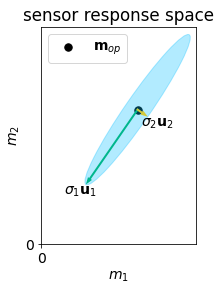

In [146]:
m_op = np.array([10, 14])
fig, ax = plt.subplots()
plt.scatter(m_op[0], m_op[1], label="$\mathbf{m}_{op}$", color="k", s=55)
# plt.plot(x+m_op[0], y+m_op[1], color=cool_colors["blue"], zorder=0, lw=2)
angle_of_ellipse = -np.arccos(np.dot(np.array([1, 0]), u1)) * 180/np.pi
ellipse = Ellipse((m_op[0], m_op[1]), 2*sigmas[0], 2*sigmas[1], angle=angle_of_ellipse, alpha=0.3, color=cool_colors["blue"], ec=cool_colors["blue"])
ax.add_artist(ellipse)
ax.set(xlabel="$m_1$", ylabel="$m_2$", title="sensor response space", xticks=[0], yticks=[0])
sketch_vector(m_op, sigmas[0] * u1, label="$\sigma_1\mathbf{u}_1$", dx_mag=0.95, color=cool_colors["green"])
sketch_vector(m_op, sigmas[1] * u2, label="$\sigma_2\mathbf{u}_2$", dx_mag=1.25, color=cool_colors["yellow"], scale_back=0.6)
# plt.arrow(m_op[0], m_op[1], sigmas[0] * u1[0], sigmas[0] * u1[1], head_width=0.5, length_includes_head=True, color="k")
# plt.arrow(m_op[0], m_op[1], sigmas[1] * u2[0], sigmas[1] * u2[1], head_width=0.5, length_includes_head=True, color="k")
# plt.text(x0[0] + x[0] + dx_label, x0[1] + x[1] + dx_label, label, ha="center", va="center")
ax.set_aspect('equal', 'box')
plt.xlim((0.0, 16.02451477673121))
plt.ylim((0.0, 22.591244938837093))
plt.savefig("toy_response_space.pdf", format="pdf", bbox_inches='tight')
plt.legend(loc="upper left")

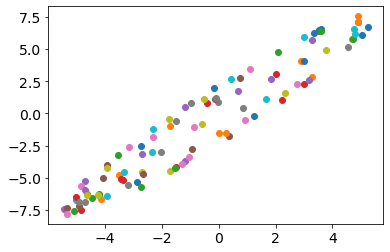

In [152]:
# test that it includes all of ellipse
for i in range(100):
    x_rand = np.random.randn(3)
    x_rand = x_rand / np.linalg.norm(x_rand) # random unit vector
    m_rand = np.dot(J, x_rand)
    plt.scatter(m_rand[0], m_rand[1])

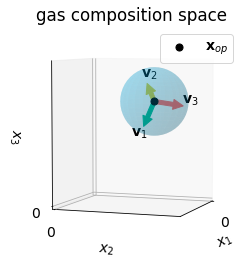

In [20]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(X, Y, Z, alpha=0.2, rstride=1, cstride=1, color=cool_colors["blue"])
ax.set(xlabel="$x_1$", ylabel="$x_2$", zlabel="$x_3$", 
       xticks=[0], yticks=[0], zticks=[0],
       title="gas composition space")

ax.scatter(x_op[0], x_op[1], x_op[2], color="k", s=50, label="$\mathbf{x}_{op}$")
v_labels = ["$\mathbf{v}_1$", "$\mathbf{v}_2$", "$\mathbf{v}_3$"]
v_label_stretches = [-0.02, 0.02, 0.02]
for (i, v) in enumerate([v1, v2, v3]):
    color = "k"
    if i == 0:
        color = cool_colors["green"]
    if i == 1:
        color = cool_colors["yellow"]
    if i == 2:
        color = cool_colors["red"]
    ax.arrow3D(x_op[0], x_op[1], x_op[2],
               r*v[0], r*v[1], r*v[2],
               v_labels[i],
               v_label_stretches[i],
               mutation_scale=20,
               ec=color,
               fc=color)
# https://github.com/matplotlib/matplotlib/issues/17172

ax.set_xlim(xmin=0)
ax.set_ylim(ymin=0)
ax.set_zlim(zmin=0)
ax.set_box_aspect([ub - lb for lb, ub in (getattr(ax, f'get_{a}lim')() for a in 'xyz')])

ax.legend()
ax.view_init(elev=5., azim=20)
plt.savefig("toy_composition_space.pdf", format="pdf", bbox_inches='tight')
plt.show()